In [44]:
import cv2
from matplotlib import pyplot as plt

In [45]:
# Load image, grayscale, Gaussian blur, adaptive threshold
image = cv2.imread('1.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (9,9), 0)
thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,30)

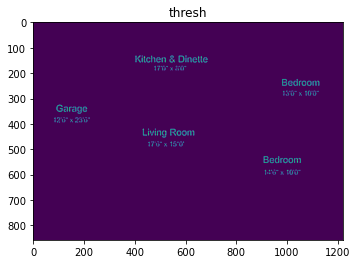

In [46]:
plt.imshow(thresh)
plt.title('thresh')
plt.show()

In [75]:
# Dilate to combine adjacent text contours
TextPxl = cv2.getStructuringElement(cv2.MORPH_RECT, (1,1))
dilate = cv2.dilate(thresh, kernel, iterations=1)

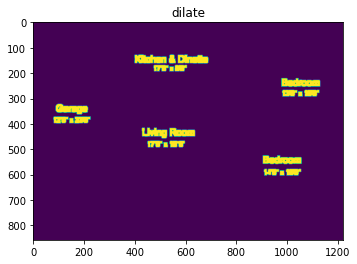

In [76]:
plt.imshow(dilate)
plt.title('dilate')
plt.show()

In [68]:
# Find contours, highlight text areas, and extract ROIs
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

In [69]:
#ROI_number = 0
ROIList = []
for c in cnts:
    area = cv2.contourArea(c)
    if area > 10000:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 3)
        ROI = image[y:y+h, x:x+w]
        ROIList.append(ROI)
        #cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
        #ROI_number += 1

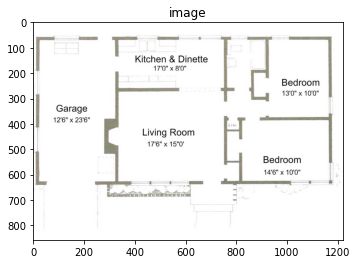

In [70]:
plt.imshow(image)
plt.title('image')
plt.show()

In [71]:
ROIList

[]

In [120]:
import os
os.chmod(r'C:\Users\saaim\Jupetor\1.png', 777)

In [121]:
import pytesseract

img = cv2.imread(r'C:\Users\saaim\Jupetor\1.png')

# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

PermissionError: [WinError 5] Access is denied